In [69]:
%load_ext autoreload
%autoreload 2
import torch as t
import matplotlib.pyplot as plt
from gninvert.graph_compare import model_compare
from gninvert.rule_discovery import view_run_results
from gninvert.hyperparamsearch import get_hyperparam_dtree, view_hp_results_graph
from gninvert.dtree import decision_tree_paths
from gninvert.gns import RecoveredGN

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Stats for 20 steps for node features:
Greatest relative difference: 136.7021918296814%
Average relative difference: 112.82766520977022%
Smallest relative difference: 100.05309581756592%
Greatest absolute difference: 0.128168523311615
Average absolute difference: 0.05053067030385137
Smallest absolute difference: 0.00021958351135253906%


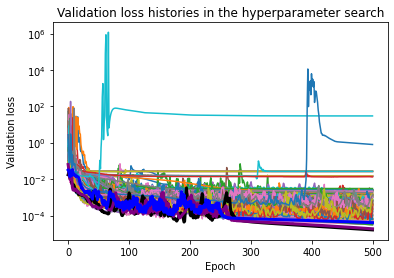

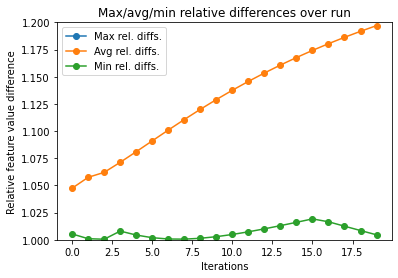

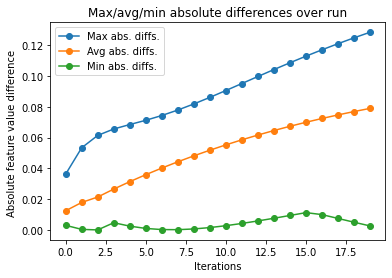

The model being tested finished the run outputting this graph:


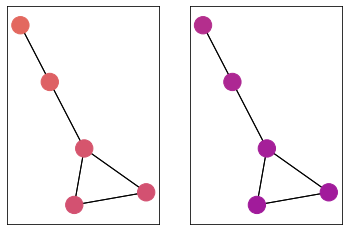

tensor([[0.5337, 0.3492],
        [0.5333, 0.3496],
        [0.5490, 0.3606],
        [0.5874, 0.3896],
        [0.6131, 0.4111]])
The ground truth model finished the run outputting this graph:


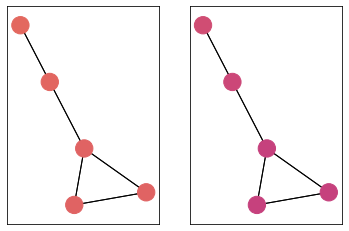

tensor([[0.5953, 0.4774],
        [0.5952, 0.4774],
        [0.5969, 0.4784],
        [0.6060, 0.5024],
        [0.6103, 0.5206]], grad_fn=<AddmmBackward0>)


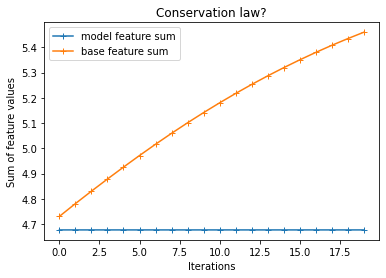

{'message_sr_result': [complexity                                                      9
loss                                                     0.000674
score                                                    0.754506
equation        ((((xs2 * -1.8978072) + xs1) + xt2) * -0.17295...
sympy_format    -0.17295937*xs1 + 0.328243537693464*xs2 - 0.17...
Name: 4, dtype: object, complexity                                   5
loss                                  0.002205
score                                  1.18705
equation             ((xt1 - xs1) * 0.4140797)
sympy_format    -0.4140797*xs1 + 0.4140797*xt1
Name: 2, dtype: object], 'update_sr_result': [complexity                      3
loss                     0.004837
score                    0.858164
equation        (a1 - 0.14857969)
sympy_format      a1 - 0.14857969
Name: 1, dtype: object, complexity                                                     15
loss                                                     0.000064
score           

In [66]:
view_run_results("runs/diff2_try2_diff2")

In [81]:
[res['settings'][3] for res in t.load('runs/diff2_try2_diff2/hpsearch')[0:10]]

[[16],
 [16],
 [8, 8, 8],
 [8, 8, 8],
 [16, 16, 16],
 [16],
 [8, 8, 8],
 [16],
 [16],
 [16]]

In [86]:
decision_tree_paths(get_hyperparam_dtree(t.load('runs/diff2_try2_diff2/hpsearch'),
                            eq_threshold = 2))

[[('regularization_coefficient', False), (3, (16,)), -4.283589309150529],
 [('regularization_coefficient', False),
  (3, (8, 8, 8)),
  ('regularization_norm', 2),
  -4.219599535447233],
 [('regularization_coefficient', 1e-05), (3, (16,)), -3.9251771849767794],
 [('regularization_coefficient', 1e-05),
  (3, (8, 8)),
  ('regularization_norm', 1),
  -3.7661487359100327],
 [('regularization_coefficient', False), (3, (8, 8)), -3.731731082151286],
 [('regularization_coefficient', 1e-05),
  (3, (16, 16, 16)),
  ('regularization_norm', 2),
  -3.6918945417490865],
 [('regularization_coefficient', False),
  (3, (16, 16, 16)),
  ('regularization_norm', 2),
  -3.6701784783931015],
 [('regularization_coefficient', 1e-05), (3, (8, 8, 8)), -3.5880250738482964],
 [('regularization_coefficient', 1e-05),
  (3, (8, 8)),
  ('regularization_norm', 2),
  -3.531458692136205],
 [('regularization_coefficient', 1e-05),
  (3, (32, 32)),
  ('regularization_norm', 2),
  -3.4626418359523887],
 [('regularization_coe

In [79]:
RecoveredGN.load('runs/diff2_try2_diff2/sr').message_sr_result[0].equation

'((((xs2 * -1.8978072) + xs1) + xt2) * -0.17295937)'

In [98]:
model = t.load("runs/delete20_diff2/hpsearch")[0]['model']

In [116]:
list(model.parameters())[0].min()

tensor(-5.7590e-06, grad_fn=<MinBackward1>)

In [121]:
[list(model.parameters())[i].shape for i in range(len(list(model.parameters())))]

[torch.Size([500, 4]),
 torch.Size([500]),
 torch.Size([500, 500]),
 torch.Size([500]),
 torch.Size([2, 500]),
 torch.Size([2]),
 torch.Size([500, 4]),
 torch.Size([500]),
 torch.Size([500, 500]),
 torch.Size([500]),
 torch.Size([2, 500]),
 torch.Size([2])]

In [127]:
model.u.forward(t.tensor([0., 0., 0., 0.]))

tensor([1., 0.], grad_fn=<SigmoidBackward0>)

In [128]:
model.m.forward(t.tensor([4., 2., 1., -1e-18]))

tensor([1., 1.], grad_fn=<SigmoidBackward0>)

Stats for 20 steps for node features:
Greatest relative difference: 235.89658737182617%
Average relative difference: 126.85531556606293%
Smallest relative difference: 100.16288757324219%
Greatest absolute difference: 0.6365935802459717
Average absolute difference: 0.1352191148325801
Smallest absolute difference: 0.0010020732879638672%


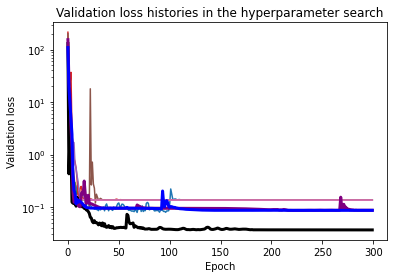

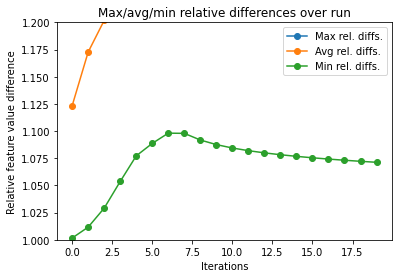

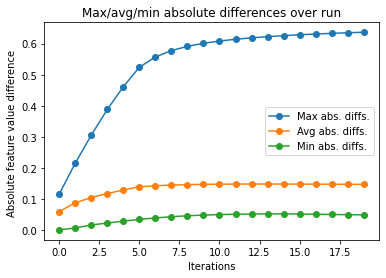

The model being tested finished the run outputting this graph:


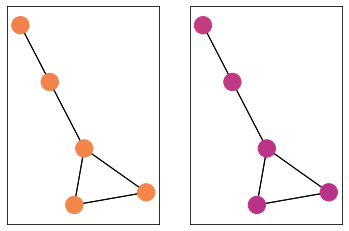

tensor([[0.7085, 0.4297],
        [0.7082, 0.4301],
        [0.7057, 0.4358],
        [0.6986, 0.4530],
        [0.6932, 0.4684]])
The ground truth model finished the run outputting this graph:


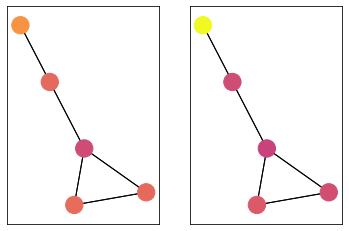

tensor([[0.6202, 0.5248],
        [0.6281, 0.5660],
        [0.5163, 0.4880],
        [0.6158, 0.5181],
        [0.7426, 1.1050]], grad_fn=<AddmmBackward0>)


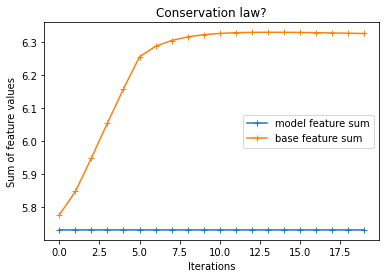

couldn't load SR


In [150]:
view_run_results("runs/testrelu_diff2")

In [3]:
hpres = t.load('runs/baseline_diff2/hpsearch')

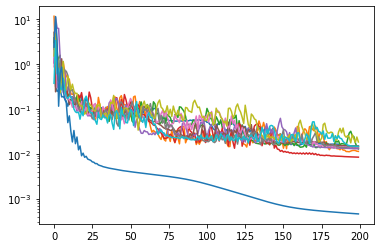

In [4]:
[plt.plot(hpres[i]['val_loss_history']) for i in range(11)]
plt.yscale('log')

Stats for 20 steps for node features:
Greatest relative difference: 157.55878686904907%
Average relative difference: 124.87942934036256%
Smallest relative difference: 100.00361204147339%
Greatest absolute difference: 0.24059593677520752
Average absolute difference: 0.11448166258633137
Smallest absolute difference: 2.3126602172851562e-05%


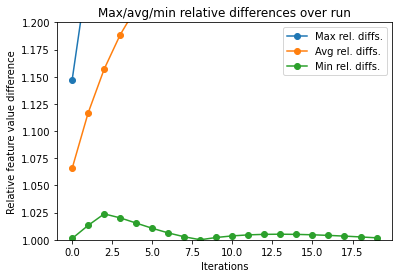

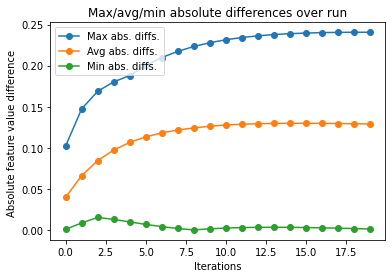

The model being tested finished the run outputting this graph:


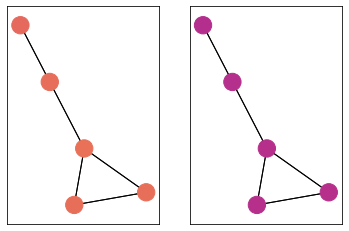

tensor([[0.6338, 0.4180],
        [0.6338, 0.4180],
        [0.6416, 0.4207],
        [0.6308, 0.4163],
        [0.6206, 0.4123]], grad_fn=<AddmmBackward0>)
The ground truth model finished the run outputting this graph:


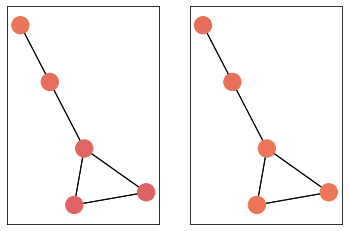

tensor([[0.5969, 0.6586],
        [0.5970, 0.6586],
        [0.6068, 0.6530],
        [0.6320, 0.6384],
        [0.6501, 0.6273]])


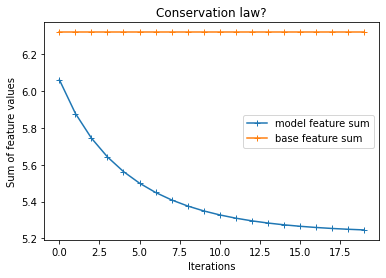

(Data(x=[5, 2], edge_index=[2, 10]), Data(x=[5, 2], edge_index=[2, 10]))

In [6]:
model_compare(hpres[10]['model'], t.load('runs/baseline_diff2/gn'))

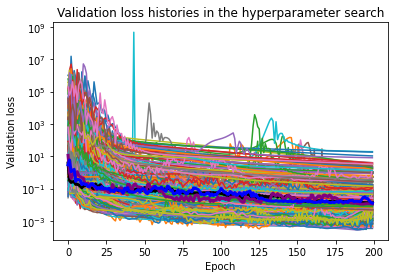

In [7]:
view_hp_results_graph(hpres, ordered=True)

In [8]:
from gninvert.functions import sort_with
hpres_v = sort_with(lambda res : res['val_loss_history'][-1], hpres)

In [9]:
hpres_v[0]['settings']

{'loss_func': MSELoss(),
 'optimizer': 'adam',
 'regularization_coefficient': 0.001,
 'regularization_norm': 2,
 'starting_lr': 0.1,
 'lr_scheduler_dec_factor': 0.2,
 'lr_scheduler_patience': 25,
 'lr_scheduler_cooldown': 1,
 'batch_size': 2,
 'adam_weight_decay': 1e-07,
 'epochs': 200,
 1: 2,
 2: 2,
 3: [32, 32],
 4: torch.nn.modules.activation.GELU,
 5: False}

In [10]:
hpres_v[1]['settings']

{'loss_func': MSELoss(),
 'optimizer': 'adam',
 'regularization_coefficient': False,
 'regularization_norm': 1,
 'starting_lr': 0.1,
 'lr_scheduler_dec_factor': 0.2,
 'lr_scheduler_patience': 25,
 'lr_scheduler_cooldown': 1,
 'batch_size': 2,
 'adam_weight_decay': 1e-07,
 'epochs': 200,
 1: 2,
 2: 2,
 3: [16, 16, 16],
 4: torch.nn.modules.activation.GELU,
 5: False}

In [11]:
hpres_v[2]['settings']

{'loss_func': MSELoss(),
 'optimizer': 'adam',
 'regularization_coefficient': False,
 'regularization_norm': 2,
 'starting_lr': 0.1,
 'lr_scheduler_dec_factor': 0.2,
 'lr_scheduler_patience': 75,
 'lr_scheduler_cooldown': 1,
 'batch_size': 2,
 'adam_weight_decay': 1e-07,
 'epochs': 200,
 1: 2,
 2: 2,
 3: [64],
 4: torch.nn.modules.activation.GELU,
 5: False}

In [65]:
dtree = get_hyperparam_dtree(hpres, eq_threshold=1)
decision_tree_paths(dtree)

[[(3, (64,)),
  (5, False),
  ('loss_func', MSELoss()),
  ('regularization_norm', 1),
  ('regularization_coefficient', 1e-05),
  ('lr_scheduler_patience', 25),
  -3.0106295005379113],
 [(3, (64,)),
  (5, False),
  ('loss_func', MSELoss()),
  ('regularization_norm', 2),
  ('lr_scheduler_patience', 75),
  -2.950464502801299],
 [(3, (16, 16, 16)),
  ('loss_func', MSELoss()),
  ('regularization_coefficient', False),
  ('lr_scheduler_patience', 25),
  (5, False),
  ('regularization_norm', 1),
  -2.938636626901415],
 [(3, (32, 32)),
  (5, False),
  ('loss_func', MSELoss()),
  ('regularization_coefficient', 1e-05),
  ('lr_scheduler_patience', 75),
  -2.8319274642093477],
 [(3, (64,)),
  (5, False),
  ('loss_func', MSELoss()),
  ('regularization_norm', 2),
  ('lr_scheduler_patience', 25),
  -2.824284536456426],
 [(3, (64,)),
  (5, False),
  ('loss_func', MSELoss()),
  ('regularization_norm', 1),
  ('regularization_coefficient', False),
  -2.80895484970761],
 [(3, (64,)),
  (5, False),
  ('loss